<a href="https://colab.research.google.com/github/chamberslaura/Machine-Intelligence/blob/main/Assignment_1__PCA_tSNE_Chambers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: PCA- tSNE

## Note
* Use Google Colab to do this assignment.
* Don't change existing code or text.
* Add code and write text as instructed.

## Submission
* File > Download .ipynb
* Submit .ipynb file on the Learn.  

## Submission Notes
(Please write any notes here that you think we should know during marking)

# [NO MARKS] PCA Warming Up (MUST READ)

Some code to illustrate examples of PCA using sklearn library.

**Let's create some random `5d` data**

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

# 100 points of 5d data
data = np.random.rand(100, 5)

**Lets convert this `5d` data to `2d` using `PCA`**


In [ ]:
# n_components=2 because I want to convert 5d data to 2d i.e, d=5 and k=2 based on the notation in Tutorial.
pca = PCA(n_components=2)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In code above when we call `fit`, it populates two things in `pca`:
1. `mean_`
2. `components_`

In [ ]:
# mean of the input data (per dimension) used to zeroying the mean
pca.mean_

array([0.48931861, 0.50940851, 0.50220339, 0.43864972, 0.47538207])

In [ ]:
# basis vectors: k by d projection marix (this is the transposed of projection matrix based on notation in the Tutorial.)
pca.components_

array([[ 0.03357706,  0.37482079, -0.26186265,  0.58835806,  0.66606658],
       [-0.26292755,  0.34646204, -0.71573519, -0.54606374,  0.0192531 ]])

Now we are ready to transform `5d` from `data` into `2d` using following code

In [ ]:
data_to_reduce = data[:10]
reduced_data = np.dot(data_to_reduce - pca.mean_, pca.components_.T)

# reduced data from 5d to 2d
reduced_data.shape

(10, 2)

You can accomplish the same using `transform` function provided in `pca`

In [ ]:
pca.transform(data_to_reduce).shape

(10, 2)

Time for inverse transform or changing `2d` data back to `5d`

Compression --> Decompression

In [ ]:
decompressed_data = np.dot(reduced_data, pca.components_)+pca.mean_
decompressed_data

array([[0.56667786, 0.38593629, 0.73094274, 0.57266268, 0.43536273],
       [0.54742477, 0.35032361, 0.7299398 , 0.45720639, 0.3394884 ],
       [0.40814682, 0.45907099, 0.41383932, 0.07539947, 0.23039167],
       [0.44295195, 0.76054925, 0.21578208, 0.57754419, 0.78194829],
       [0.55087689, 0.24083603, 0.82779866, 0.33450694, 0.17182944],
       [0.45647878, 0.30341466, 0.62293567, 0.06196025, 0.08013681],
       [0.46985299, 0.42264488, 0.54397738, 0.25910253, 0.29747665],
       [0.36817308, 0.55542578, 0.26820136, 0.04643795, 0.30300208],
       [0.57585963, 0.37343171, 0.75627913, 0.59122991, 0.43404324],
       [0.50955574, 0.34492214, 0.67347216, 0.31011779, 0.25403969]])

In [ ]:
# same can we accomplished using inverse_transform
pca.inverse_transform(pca.transform(data_to_reduce))

array([[0.56667786, 0.38593629, 0.73094274, 0.57266268, 0.43536273],
       [0.54742477, 0.35032361, 0.7299398 , 0.45720639, 0.3394884 ],
       [0.40814682, 0.45907099, 0.41383932, 0.07539947, 0.23039167],
       [0.44295195, 0.76054925, 0.21578208, 0.57754419, 0.78194829],
       [0.55087689, 0.24083603, 0.82779866, 0.33450694, 0.17182944],
       [0.45647878, 0.30341466, 0.62293567, 0.06196025, 0.08013681],
       [0.46985299, 0.42264488, 0.54397738, 0.25910253, 0.29747665],
       [0.36817308, 0.55542578, 0.26820136, 0.04643795, 0.30300208],
       [0.57585963, 0.37343171, 0.75627913, 0.59122991, 0.43404324],
       [0.50955574, 0.34492214, 0.67347216, 0.31011779, 0.25403969]])

In [ ]:
# Lets find compression decompression error (absolute mean error)
np.sum(np.abs(data_to_reduce - decompressed_data))/data_to_reduce.size

0.1595239144494722

# PCA 


## Problem 1: PCA objective function [35 marks]


## 1-a) [10 marks]
Show that minimizing the reconstruction loss in PCA i.e,

\begin{equation}
\begin{aligned}
& \underset{\mathbf{W}}{\text{arg min}} &&   \| \mathbf{X}-\mathbf{X}\mathbf{W}\mathbf{W}^T \| ^2_F,  \quad \mathbf{W}^T \mathbf{W}=\mathbf{I}_k, \quad (1)
\end{aligned}
\end{equation}

is equivalent to maximizing variance in all orthogonal projction directions i.e,

$$
\underset{\mathbf{W}}{\text{arg max}} \quad \textrm{Tr}\{\mathbf{W}^{T}\mathbf{X}^{T}\mathbf{X}\mathbf{W}\}\quad
\textrm{s.t.} \quad  \mathbf{W}^T \mathbf{W}=\mathbf{I}_k, \quad (2)
$$
where $ \textrm{Tr}$ is trace function, $\| .\|_F$ is frobenius norm, $\mathbf{X}$ is $n$ by $d$ data matrix ($n$ number of data points and $d$ dimensionality), $\mathbf{W}$ is a $d$ by $k$  projection matrix, and $\mathbf{I}_k$ is $k$ by $k$ identity matrix.

Hint 1: Try to expand the frobenus norm in relation (1) and note that $\mathbf{W}^T \mathbf{W}=\mathbf{I}_k$.

Hint 2: In order to show this you may use Trace of a product and Cyclic property of the Trace function. You can read about Cyclic property of Trace function [here](https://en.wikipedia.org/wiki/Trace_(linear_algebra)). <br>
<br>


Answer to 1-a):

Expand the frobenius norm:

$$
\| \mathbf{X}-\mathbf{X}\mathbf{W}\mathbf{W}^T \| ^2_F = \textrm{Tr}\{(\mathbf{X}-\mathbf{X}\mathbf{W}\mathbf{W}^T)
^T(\mathbf{X}-\mathbf{X}\mathbf{W}\mathbf{W}^T)\}
$$ 
$$
\| \mathbf{X}-\mathbf{X}\mathbf{W}\mathbf{W}^T \| ^2_F = \textrm{Tr}\{\mathbf{X}^T\mathbf{X}-\mathbf{X}^T\mathbf{X}\mathbf{W}\mathbf{W}^T-\mathbf{X}^T\mathbf{W}^T\mathbf{W}\mathbf{X}+\mathbf{X}^T\mathbf{W}^T\mathbf{W}\mathbf{X}\mathbf{W}\mathbf{W}^T\}
$$

Collect like terms and apply the Cyclic property of the trace function:

$$
\| \mathbf{X}-\mathbf{X}\mathbf{W}\mathbf{W}^T \| ^2_F = \textrm{Tr}\{\mathbf{X}^T\mathbf{X}\}-2\textrm{Tr}\{\mathbf{W}^T\mathbf{X}^T\mathbf{X}\mathbf{W}\}+\textrm{Tr}\{\mathbf{W}^T\mathbf{X}^T\mathbf{X}\mathbf{W}\}
$$
$$
\| \mathbf{X}-\mathbf{X}\mathbf{W}\mathbf{W}^T \| ^2_F = const-\textrm{Tr}\{\mathbf{W}^T\mathbf{X}^T\mathbf{X}\mathbf{W}\}
$$

The second term in the last line, $\textrm{Tr}\{\mathbf{W}^T\mathbf{X}^T\mathbf{X}\mathbf{W}\}$ is variance. It is subtracted from a constant; therefore, maximizing variance on the right side of the equation minimizes reconstruction error on the left side of the equation.


## 1-b) [10 marks]
Show that projection matrix in PCA i.e, $\mathbf{W}$ is rotation invariant .
Hint: You need to show that if we replace $\mathbf{W}$ with $\mathbf{W}\mathbf{R}$ where $\mathbf{R}$ is a $k$ by $k$ rotation matrix (rotation matrix is a square orthohonal matrix such that $\mathbf{R}^T\mathbf{R}=\mathbf{R}\mathbf{R}^T=\mathbf{I}_k$) then the objective value in relation (2) is the same.

Hint: In order to show this you may use Trace of a product and Cyclic property of the Trace function. You can read about Cyclic property of Trace function [here](https://en.wikipedia.org/wiki/Trace_(linear_algebra)).

Answer to 1-b):

Replacing $\mathbf{W}$ with $\mathbf{W}\mathbf{R}$ gives:
$$
\textrm{Tr}\{(\mathbf{WR})^T\mathbf{X}^T\mathbf{X}\mathbf{WR}\}
$$
$$
= \textrm{Tr}\{\mathbf{R}^T\mathbf{W}^T\mathbf{X}^T\mathbf{X}\mathbf{WR}\}
$$
$$
= \textrm{Tr}\{\mathbf{R}\mathbf{R}^T\mathbf{W}^T\mathbf{X}^T\mathbf{X}\mathbf{W}\}
$$
$$
= \textrm{Tr}\{\mathbf{I}\mathbf{W}^T\mathbf{X}^T\mathbf{X}\mathbf{W}\}
$$
$$
= \textrm{Tr}\{\mathbf{W}^T\mathbf{X}^T\mathbf{X}\mathbf{W}\}
$$

The result is the same as relation (2); therefore, the projection matrix $\mathbf{W}\$ is rotation invariant.

## 1-c) [10 marks] 
Assume we have the data matrix 
$\mathbf{X}$ $n$ by $d$  ($n$ number of data points and $d$ dimensionality), and the projection martix $\mathbf{W}$ ($d$ by $k$) from PCA algorithm. Explain in detail how we can use this $\mathbf{W}$ to denoise $\mathbf{X}$? <br>

write the mathematical exparession for calcuating the denoised data and explain role of $k$ in denoising.

Answer to 1-c):

The mathematical expression for calcuating the denoised data is:

$$
\mathbf{X}_{denoised}=\mathbf{X}\mathbf{W}\mathbf{W}^T
$$

The term $\mathbf{X}\mathbf{W}$ reduced the dimensionality of $\mathbf{X}$ and the term $\mathbf{W}^T$ reconstructs this projected data, returning it to its original dimensionality. 

The value of $k$ determines the proportion of variance (i.e., the number of principal components) included in the projection matrix, $\mathbf{W}$. The lowest variance principal components represent noise in the data. Excluding these principal components from the projection matrix based on the value of $k$ denoises the data when $\mathbf{X}$ is reconstructed.


## 1-d) [5 marks] 
For a $d$ dimensional data, you can ALWAYS reconstruct the data with 0\% error if all $d$ PCAs are used. In other words if we set $k$ equal to $d$ in the relation (1) we can obtain a $\mathbf{W}$ such that the reconstruction loss $\| \mathbf{X}-\mathbf{X}\mathbf{W}\mathbf{W}^T \| ^2_F$ is zero.

- True
- False

Answer to 1-d): Write True or False.

True

## Problem 2: Visualize eigenvectors in face dataset: Eigenfaces [35 marks]

We know that $k$ columns of projection matrix $\mathbf{W}$ where $\mathbf{W}$ is $d$ by $k$ ($d$ original dimenionality and $k$ dimensionality of projected data) or equally top $k$ eigenvectors associated with $k$ largest eigenvalues of covariance matrix show projection directiond with highest variances. <br>

In this question, we want to apply PCA on face dataset and visulize the the columns of projection matrix (principal components) as face images.



The following code load the face dataset:

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.images.shape)

(1348, 62, 47)


Clearly there are 1348 images each with the size of (62,47). The following code plot the first 7 images in this dataset:

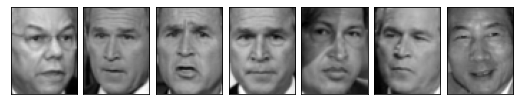

In [ ]:
# Plot the images
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 7, figsize=(9, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(7):
    ax[i].imshow(faces.images[i], cmap='binary_r')

## 2-a) [5 marks]
Use reshape metod to reshpe this data from (1348, 62, 47)
to (1348, 2914) such that X is the reshaped data:


In [ ]:
#write your code here to reshape the data

X = np.reshape(faces.images, (1348, 2914))
print(faces.images.shape)
print(X.shape)



(1348, 62, 47)
(1348, 2914)


## 2-b) [5 marks]
Import PCA from sklearn and fit your model on X dataset using 150 principal components.

In [ ]:
# write your code here

from sklearn.decomposition import PCA

pca = PCA(n_components=150)
projected = pca.fit_transform(X)
print(X.shape)
print(projected.shape)


(1348, 2914)
(1348, 150)


##2-c) [5 marks]
The components_ attribute return the projection matrix in $k$ by $d$ format i.e, each row is an eigenvector. Choose the first eigenvector of the covariance matrix (first row in of projection matrix extracted by components_ attribute), this should be a 1 by $d$ (here 1 by 2914) vector.

Try to reshape it to a (62 by 47) matrix and visualize it as a grey scalse image.

Hint: use plt.imshow("your image here", cmap='bone') to visualize this eigenvector (eigenface).

(1, 2914)
[[-0.00579718 -0.00595364 -0.0061577  ... -0.0100011  -0.0090109
  -0.00813916]]


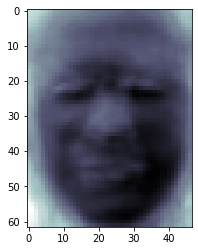

In [ ]:
# Write you code here

projection_matrix = pca.components_
eigenvector = projection_matrix[0:1,:]
print(eigenvector.shape)
print(eigenvector)
eigenface = np.reshape(eigenvector, (62, 47))
plt.imshow(eigenface, cmap='bone')


##2-d) [5 marks]
Please explain your intuition about the viuslized eigenvector as an image in 2-3 lines. What does it mean? What does it look like?

Write your answer to 2-d here:
.....

The visualized eigenvector resembles a face. It looks as thought the eigenvector corresponds to low frequency data in the images. The pixel values show the general shapes and highlights/shadows in the face, rather than high frequency details and noise. The eigenvector represents the principal component in the data set with the highest variance. That suggests that this kind of shape/shadows data varies the most among the faces in the dataset.

## 2-e) [5 marks]
Use plt.subplots to visualize the first 50 eigenfaces. Visualize them in a 5 by 10 array of eigenfaces using subplots.

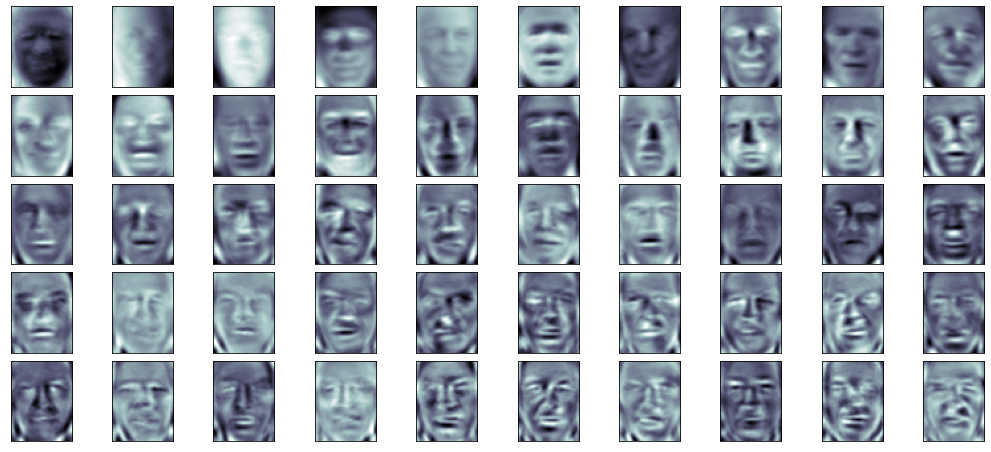

In [ ]:
# write your code here to Plot the first 50 eigenfaces

fig, axes = plt.subplots(5, 10, figsize=(18, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')


## 2-f) [5 marks]
Repeat part 2-b but this time with 1348 components. Then
use plt.subplots to visualize the **last** 50 eigenfaces. Visualize them in a 5 by 10 array of eigenfaces.

(1348, 2914)
(1348, 1348)


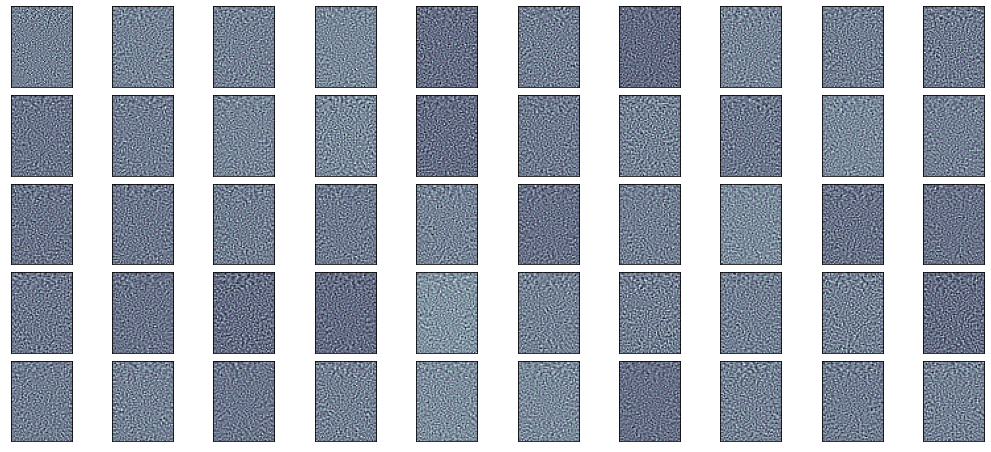

In [ ]:
# write your code here to Plot the last 50 eigenfaces

from sklearn.decomposition import PCA

pca = PCA(n_components=1348)
projected = pca.fit_transform(X)
print(X.shape)
print(projected.shape)

fig, axes = plt.subplots(5, 10, figsize=(18, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[-(i+1)].reshape(62, 47), cmap='bone')


##2-g) [5 marks]
Please explain your intuition about the viuslized eigenfaces in 2-3 lines. what do they mean? why do they looklike?



Write your answer to 2-g here:
.....

The first row of eigenfaces appear to characterized by the general shapes, highlights, and shadows of the faces, as well as specific facial features like eyes, nose, and mouth. After that, the specific characteristics become less discernable, but are still recognizable as faces.

The last 50 eigenfaces are unregonizable and indistinct. They all look like abstract, speckled patterns. This suggests that the first 50 eigenfaces contribute the majority of variance to the way the faces look, and the last 50 eigenfaces are primarily noise.

## Problem 3: Denoising by PCA [15 marks]

Run the following cell to load and visualize the faces again:

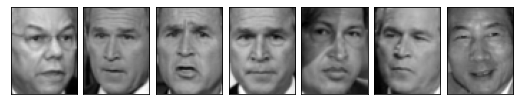

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
# Plot the images
fig, ax = plt.subplots(1, 7, figsize=(9, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(7):
    ax[i].imshow(faces.images[i], cmap='binary_r')

Use reshpe metod to reshpe this data from (1348, 62, 47)
to (1348, 2914) such that X is the reshaped data:


In [ ]:
#write your code here to reshape the data

X = np.reshape(faces.images, (1348, 2914))
print(faces.images.shape)
print(X.shape)


(1348, 62, 47)
(1348, 2914)


##3-a) [5 marks]
Generate a random matrix sampled from normal distribution with mean equal to 1 and standard deviation equal to 20 with the size of X. Name this matrix noise and add this to the X to get noisy_X. Then run the cell to visualize some of the noisy images.

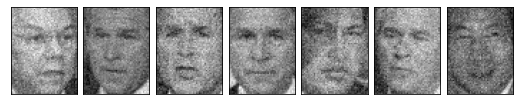

In [ ]:
# write your code here
noise = np.random.normal(loc=1.0, scale=20.0, size=(1348,2914))
noisy_X = X + noise
fig, ax = plt.subplots(1, 7, figsize=(9, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(7):
    ax[i].imshow(noisy_X[i].reshape(62, 47), cmap='binary_r')

##3-b) [5 marks]
Denose the images using PCA algorithm. Choose $k$ such that 80 % of variance in data is captured. name the denoised data "filtered".

In [ ]:
pca = PCA(0.80).fit(noisy_X)
print(pca.n_components_)
components = pca.transform(noisy_X)
filtered = pca.inverse_transform(components)


192


Run the next cell to visualize some of the denoised images.

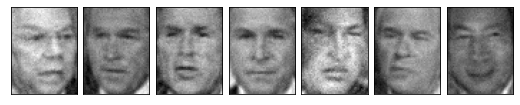

In [ ]:
fig, ax = plt.subplots(1, 7, figsize=(9, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(7):
    ax[i].imshow(filtered[i].reshape(62, 47), cmap='binary_r')

##3-c) [5 marks]
Repeat 3-b with the  $k$ that it captures 40 % of variance in data and then visiualize the first 7 denoised images. Compare the results of 3-c with 3-b and write your conclusion in 2-3 lines.

In [ ]:
# write the denoising code here name the denoised data "filtered"
pca = PCA(0.40).fit(noisy_X)
print(pca.n_components_)
components = pca.transform(noisy_X)
filtered = pca.inverse_transform(components)

5


Run the next cell to visualize some of the denoised images.

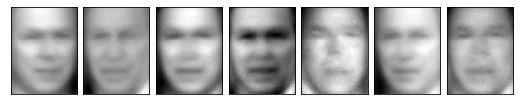

In [ ]:
fig, ax = plt.subplots(1, 7, figsize=(9, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(7):
    ax[i].imshow(filtered[i].reshape(62, 47), cmap='binary_r')

Write your conclusion here:

When the projection matrix explains 80% of variance in the data, the denoised images appear less speckled than the originals while still being recognizable.

When the projection matrix accounts for only 40% of variance in the data, the denoised images lack important information. Information is lost during reconstruction, making the images blurry and oversmoothed. In addition to noise, image detail was removed from the data.

## Problem 4: tSNE [15 marks]
In the following the digit dataset is loaded. The images and corresponsing labels are loaded in data and label variables

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
data=digits.data
label=digits.target
print(data.shape)
print(label.shape)

(1797, 64)
(1797,)


Use PCA and tSNE to obtain two-dimensional repesentations for this dataset. Use plt.scatter function to plot the 2-D representation of this dataset obtained by both PCA and tSNE method. Use labe information to assign distinct colors for data points in different classes. Based on the generated graphs, which one is a better method for visualization?

In [ ]:
# Write your code to apply PCA here

pca = PCA(n_components=2)
pca_2d = pca.fit_transform(data)
print(data.shape)
print(pca_2d.shape)


(1797, 64)
(1797, 2)


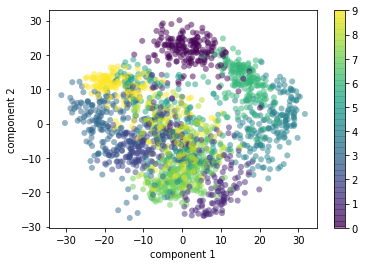

In [ ]:
# Write your code to plot the scatter plot for 2-D represntation obtained from PCA here

plt.scatter(pca_2d[:, 0], pca_2d[:, 1],
            c=label, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();


In [ ]:
# Write your code to apply TSNE here
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_2d = tsne.fit_transform(data)
print(data.shape)
print(tsne_2d.shape)

(1797, 64)
(1797, 2)


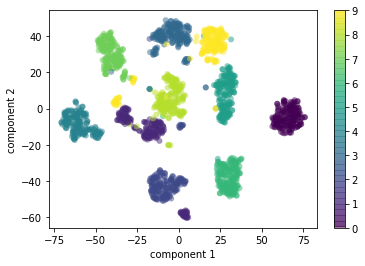

In [ ]:
# Write your code to plot the scatter plot for 2-D represntation obtained from TSNE here
plt.scatter(tsne_2d[:, 0], tsne_2d[:, 1],
            c=label, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Wrtie your conclusion about employing PCA and tSNE for data visualization

tSNE is a more effective method for data visualization because it more clearly differentiates groups (e.g., digits). 

In the PCA scatter plot, the data points are somewhat grouped by colour; however, different colours overlap signifiantly. In the tSNE scatter plot, data points are clearly grouped by colour and different colours are well separated. There is far less overlap of different colour data points.

This scatter plot comparison demonstrates that tSNE is preferred to PCA for data visualization. PCA is most effective for dimensionality reduction.